## Predicting Global Wealth Distribution

The data set for the global income statistics can be found at 'https://www.kaggle.com/datasets/konradb/global-income-statistics' 
For my data set I will be analying the global income statistics to demonstrate how much income most people that live on earth have from 1958 to 2015. The data set presents multiple variables that are very important such as Category which is the decile leve, basically a 10-dimensional vector of income shares for all of the population deciles in the region which is represented as r and in time represented by t. GINI coefficient is a summary metric of the income distribution, it is the underlying distribution of income within the region in that given time. This dataset can demonstrate the difference among the public income compared to the richer people and also the difference in the global gini values. The category people are placed in should show a significance in the analysis. If most people are falling into a category in which they are making less income on average than others, businesses are able to use this information to figure out who they should be marketing to. Which category of people are more likely to buy their product compared to other groups. 

In [1]:
#import libraries
import numpy as np
import pandas as pd

In [2]:
df_csv = pd.read_csv('Final_Global_income_distribution.csv')
df_csv.head(50)

,GCAM_region_ID,year,Category,global_shares,gdp_pcap,tot_gdp,tot_pop,share_of_richer_pop,score,global_gini
0,33,1958,d1,0.029000,8643.000000,1.159560e+11,13416218,0.9,0.055100,0.266800
1,33,1958,d2,0.053000,8643.000000,1.159560e+11,13416218,0.8,0.090100,0.266800
2,33,1958,d3,0.066000,8643.000000,1.159560e+11,13416218,0.7,0.099000,0.266800
3,33,1958,d4,0.076000,8643.000000,1.159560e+11,13416218,0.6,0.098800,0.266800
4,33,1958,d5,0.087000,8643.000000,1.159560e+11,13416218,0.5,0.095700,0.266800
5,33,1958,d6,0.098000,8643.000000,1.159560e+11,13416218,0.4,0.088200,0.266800
6,33,1958,d7,0.111000,8643.000000,1.159560e+11,13416218,0.3,0.077700,0.266800
7,33,1958,d8,0.127000,8643.000000,1.159560e+11,13416218,0.2,0.063500,0.266800
8,33,1958,d9,0.149000,8643.000000,1.159560e+11,13416218,0.1,0.044700,0.266800
9,33,1958,d10,0.204000,8643.000000,1.159560e+11,13416218,0.0,0.020400,0.266800


In [3]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GCAM_region_ID       510 non-null    int64  
 1   year                 510 non-null    int64  
 2   Category             510 non-null    object 
 3   global_shares        510 non-null    float64
 4   gdp_pcap             510 non-null    float64
 5   tot_gdp              510 non-null    float64
 6   tot_pop              510 non-null    int64  
 7   share_of_richer_pop  510 non-null    float64
 8   score                510 non-null    float64
 9   global_gini          510 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 40.0+ KB


Complete a graphical analysis (creating;4 graphs min.)
Label graphs appropriately and explain/analyze the information provided. 
Analysis should answer the question(s) addressed. 

- Category = decile level: D is a 10-dimensional vector of income shares for all population deciles in region r at time t
- GINI coefficient = a summary metric of the income distribution, underlying distribution
- Score
- share of richer pop

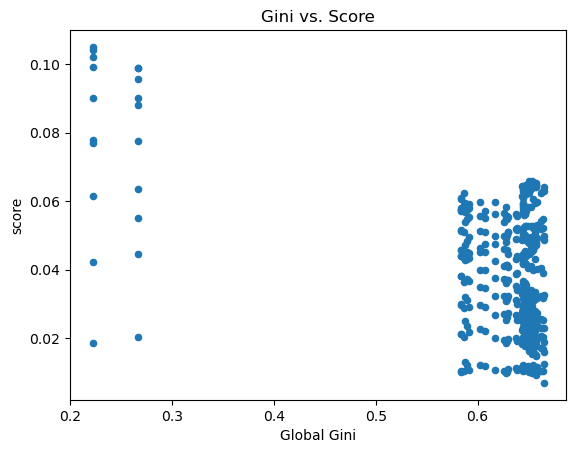

In [4]:
import matplotlib.pyplot as plt

df_csv.plot.scatter(x = 'global_gini', y = 'score')

plt.xlabel('Global Gini')
# naming the y axis
plt.ylabel('score')
  
# giving a title to my graph
plt.title('Gini vs. Score')
  
# function to show the plot
plt.show()

This scatter graph demonstrating the relationship between the global gini and the score shows very large trends. As the Global Gini becomes greater the score constantly stays between 0.1 and 0.7 but as the Global Gini gets smaller the range of the score becomes greater, from 0.01 to 0.10. As the Global Gini increases, the range of the possible scores becomes smaller. 

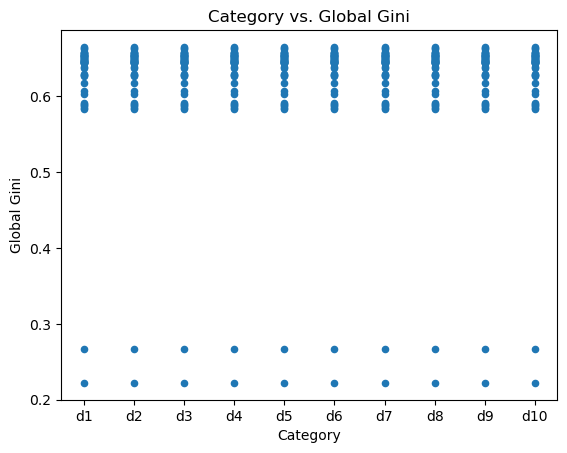

In [5]:
df_csv.plot.scatter(x = 'Category', y = 'global_gini')

plt.xlabel('Category')
# naming the y axis
plt.ylabel('Global Gini')
  
# giving a title to my graph
plt.title('Category vs. Global Gini')
  
# function to show the plot
plt.show()

The scatter plot above is demonstrating the relationship between Category and Global Gini, the chart is very uniform and symetrical, for every category there were clusters forming at the highest global gini values while they all have 2 plots between the blobal ginin values, 0.2 and 0.3. The category values do not have any significant differences between one another when being compared by global gini. 

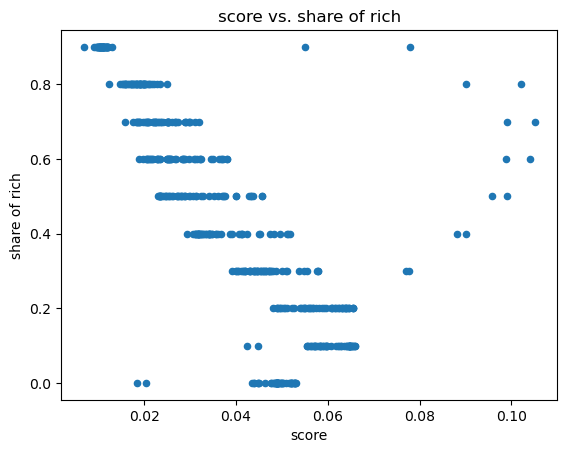

In [6]:

df_csv.plot.scatter(x = 'score', y = 'share_of_richer_pop')
plt.xlabel('score')
# naming the y axis
plt.ylabel('share of rich')
  
# giving a title to my graph
plt.title('score vs. share of rich')
  
# function to show the plot
plt.show()

The scatter plot above shows clusters forming on the graph in a negative correlation between share of the rich and scores, while there are random plots that form a postive correlation between the chare of the richest population and the score. The more significant correlation is the negative clusters.  

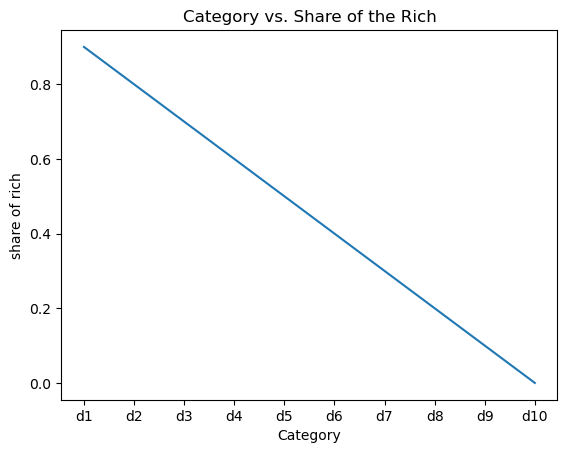

In [7]:
plt.plot(df_csv['Category'], df_csv['share_of_richer_pop'])
  
# naming the x axis
plt.xlabel('Category')
# naming the y axis
plt.ylabel('share of rich')
  
# giving a title to my graph
plt.title('Category vs. Share of the Rich')
  
# function to show the plot
plt.show()


The line graph above demonstrates the relationship between category and the share of the rich which explains the higher that the richest people in the population are in the first vew categories. As D becomes larger, the share of the rich population becomes smaller. 

## Overview/conclusion
 - Insights gained from the graphical analysis.

The Global income statistics have demonstrated that the categories are placed from 1 to 10, the closesr D is to 1, the higher the share of the richer population is. Apart from that, scores and the global gini as well as scores and share of the richer population have negative correlations. Category and global gini do not offer any significant trends or correlations, however they are all the same for every category if being compared to global gini. 

## 7.2 Term Project: Term Project Milestone 2: Data Preparation

The main goal for this project is to the provide answers for the global growth in past years and its expected growth financially, how accurate are the current statistical recordings when it comes to predicting the global gini for future years. The global gini is a summary metric of the underlying, income distribution. With so much poverty and wealth in the world, the wealthiest capitalize off of the more poor people, the problem with the world is how divided it is, most people only focus on the country they're in. For most companies that are global, figuring out and making predictions on the the distribution of income can help in deciding on who to target for their product and what price would do the best. The target for the model created in this project will be the Global Gini, the features will be all the other variables within the cleaned and prepped data frame. 

There are duplicates in the columns; total population, global gini, and the year. The value is the same for every category within that same year. Due to this, I will only be adding the value for that year once. The score for every category was different so I will add the score value for each categroy to the row with the designated year. Share of the richer population was dropped due to its significance to the main goal of the project, this variable displays the same 10 values repeated for every year. Share of the richer population corresponds to the category, for D1 the share is 0.9 and as D gets larger by one value (d1, d2, d3,d4, .... d10) the share becomes smaller by 0.1. 

In [8]:
# checking for duplicates in tot_pop column

df_csv['tot_pop'].duplicated()

0      False
1       True
2       True
3       True
4       True
       ...  
505     True
506     True
507     True
508     True
509     True
Name: tot_pop, Length: 510, dtype: bool

In [9]:
df_csv['global_gini'].duplicated()

0      False
1       True
2       True
3       True
4       True
       ...  
505     True
506     True
507     True
508     True
509     True
Name: global_gini, Length: 510, dtype: bool

In [10]:
df_csv['year'].duplicated()

0      False
1       True
2       True
3       True
4       True
       ...  
505     True
506     True
507     True
508     True
509     True
Name: year, Length: 510, dtype: bool

In [11]:
df_csv['Category'].duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
505     True
506     True
507     True
508     True
509     True
Name: Category, Length: 510, dtype: bool

In [12]:
df_csv['score'].duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
505    False
506    False
507    False
508    False
509    False
Name: score, Length: 510, dtype: bool

In [13]:
# creating new data frame with just the features that will be focused on

new = df_csv[['global_gini', 'score', 'year', 'Category', 'tot_pop']]

In [14]:
new_df = pd.DataFrame(new)
new_df

,global_gini,score,year,Category,tot_pop
0,0.266800,0.055100,1958,d1,13416218
1,0.266800,0.090100,1958,d2,13416218
2,0.266800,0.099000,1958,d3,13416218
3,0.266800,0.098800,1958,d4,13416218
4,0.266800,0.095700,1958,d5,13416218
...,...,...,...,...,...
505,0.583631,0.051692,2015,d6,7100090991
506,0.583631,0.057921,2015,d7,7100090991
507,0.583631,0.060860,2015,d8,7100090991
508,0.583631,0.056996,2015,d9,7100090991


In [15]:
# create new series for the duplicated values and separating the score for D1

list = []
d1score = []
d1gg = []
tot_pop = []

for year in new_df['year']:
    if year in list:
        pass
    else:
        int(year)
        list.append(year)
        score = new_df.loc[new_df.year == year,'score'].values[0]
        d1score.append(score)
        tot = new_df.loc[new_df.year == year,'tot_pop'].values[0]
        tot_pop.append(tot)
        gg = new_df.loc[new_df.year == year,'global_gini'].values[0]
        d1gg.append(gg)
   
d1score = pd.Series(d1score)
d1gg = pd.Series(d1gg)
list = pd.Series(list)
tot_pop = pd.Series(tot_pop)

In [16]:
# Creating function to retrieve the score values for every category 

def getvalues(x):
    list1 = []
    dscore = []
    for year in new_df['year']:
        if year in list1:
            pass
        else:
            list1.append(year)
            score = new_df.loc[new_df.year == year,'score'].values[x]
            dscore.append(score)
    dscore = pd.Series(dscore)
    return dscore

In [17]:
# assigning every category with a label

d2score = getvalues(1)
d3score = getvalues(2)
d4score = getvalues(3)
d5score = getvalues(4)
d6score = getvalues(5)
d7score = getvalues(6)
d8score = getvalues(7)
d9score = getvalues(8)
d10score = getvalues(9)

In [18]:
# bringing in all of the new features in to a new data frame that clearly displays the information for every year without duplicate values. 

df = pd.DataFrame({'Year': list, 'Global Gini': d1gg, 'D1 score': d1score, 'D2 score': d2score, 'D3 score': d3score, 'D4 score': d4score, 'D5 score': d5score, 
                   'D6 score': d6score, 'D7 score': d7score, 'D8 score': d8score, 'D9 score': d9score, 'D10 score': d10score, 'Total Pop': tot_pop})

In [19]:
# making Year feature into a date time series 
from pandas import datetime
ts = []
date = []
for item in df['Year']:
    ts.append((str(item) + '-12-31'))
    
df['Year'] = ts

df['Year'] = pd.to_datetime(df['Year'])

/var/folders/zp/2791yjh155zdd3pflhyfh5dm0000gn/T/ipykernel_22307/4089126395.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [20]:
ratio = []

for item in df['Global Gini']: 
    tot = df.loc[df['Global Gini'] == item,'Total Pop'].values[0]
    rat = item * tot
    ratio.append(rat)


In [21]:
# creating column to demonstrate if the global gini ratio with population increases every year with the increase of GG and POP. 

growth = []
for count, item in enumerate(ratio):
    i = count-1
    prev_item = ratio[i]
    if item > prev_item:
        growth.append(1) #ratio increase
    elif item < prev_item:
        growth.append(0)#ratio decrease
    else:
        growth.append(0)#ratio decrease
    
print(growth)

[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1]


In [24]:
df['GG Ratio Increase'] = growth

In [25]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None,'display.max_colwidth', -1):
    display(df)

,Year,Global Gini,D1 score,D2 score,D3 score,D4 score,D5 score,D6 score,D7 score,D8 score,D9 score,D10 score,Total Pop,GG Ratio Increase
0,1958-12-31,0.266800,0.055100,0.090100,0.099000,0.098800,0.095700,0.088200,0.077700,0.063500,0.044700,0.020400,13416218,0
1,1965-12-31,0.222122,0.077978,0.102102,0.105105,0.104104,0.099099,0.090090,0.077077,0.061562,0.042342,0.018418,14108332,0
2,1967-12-31,0.657305,0.009129,0.014614,0.017532,0.019784,0.023167,0.031989,0.047717,0.064607,0.065378,0.048778,3772962132,1
3,1968-12-31,0.664928,0.006867,0.012377,0.015821,0.018785,0.023038,0.032457,0.048682,0.063094,0.064222,0.049729,3797065922,1
4,1969-12-31,0.657075,0.009496,0.015115,0.018112,0.020283,0.023415,0.031624,0.047133,0.064009,0.064607,0.049130,3847424283,1
5,1970-12-31,0.650337,0.009995,0.016080,0.019068,0.021262,0.024066,0.032021,0.047726,0.065557,0.065912,0.047975,3915500475,1
6,1971-12-31,0.652937,0.009922,0.015822,0.018720,0.020826,0.023510,0.031471,0.047111,0.065535,0.065882,0.048265,3961583795,1
7,1972-12-31,0.653993,0.009984,0.015721,0.018456,0.020605,0.023263,0.031301,0.047132,0.065485,0.065624,0.048437,4024363006,1
8,1973-12-31,0.655643,0.010050,0.015612,0.018363,0.020529,0.023337,0.031132,0.046637,0.064660,0.065194,0.048843,4100892539,1
9,1974-12-31,0.654643,0.010523,0.016096,0.018906,0.021028,0.023732,0.030986,0.045869,0.064051,0.065263,0.048904,4150189959,1


## 9.2 Term Project: Term Project Milestone 3: Model Building and Evaluation

I will be applying a linear regression model on my data set, targeting the 

#### Model #1: Linear Regression Model

In [26]:
# Splitting the data randomly into 75% for the training data set and 25% for the test data set, The target in this model is Global Gini.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

target = df['GG Ratio Increase']
features = df.drop(['GG Ratio Increase', 'Year'], axis= 1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0)

In [27]:
# Running a linear regression on the test set and fitting the model with the data.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("r2 =", r2)
print("RMSE =", rmse)

r2 = -0.5089732333122632
RMSE = 0.32733167949477604


In [28]:
# Determining the model accuracy with linear regression score 
# score() Is just comparing the error/residual in between the actual values and the predicted values. r2_score() 
# it is the value which specifies the amount of the residual across the whole dataset. The r2 score is more robust and quite often used accuracy matrix.

model.score(X_train, y_train)

0.4570435763649735

#### Model #2: Logistic Regression Model 

In [29]:
# Running a linear regression on the test set.
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [30]:
# evaluating the logistic regression model with a confusion matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 0,  1],
       [ 0, 12]])

Text(0.5, 427.9555555555555, 'Predicted label')

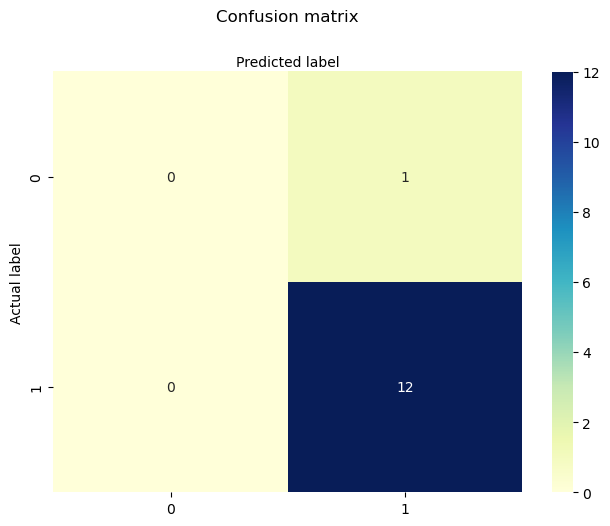

In [31]:
# plotting the confusion matrix in order to find the accuracy of this classification model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes 0 and 1 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [32]:
from sklearn.metrics import classification_report
target_names = ['Decrease', 'Increase']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Decrease       0.00      0.00      0.00         1
    Increase       0.92      1.00      0.96        12

    accuracy                           0.92        13
   macro avg       0.46      0.50      0.48        13
weighted avg       0.85      0.92      0.89        13



/Users/jocelyndisla/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jocelyndisla/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jocelyndisla/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


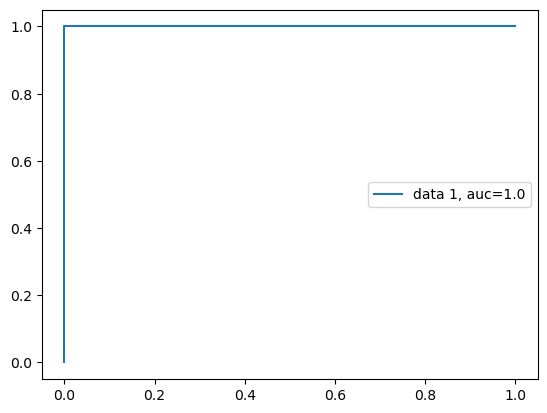

In [35]:
# ROC Curve to show graphically the tradeoff that occurs between trying to maximize the true positive rate vs. trying to minimize the false positive rate.

y_pred_proba = logreg.predict_proba(X_test)[::,0]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=5)
plt.show()

## Results



In this data analyzation process I chose to apply regression models to my data set because it is most effective for this statistical analysis and dataframe size, it helps determine patterns in data between inputs that have linear relationships. This model was a great fit for the dataset because it can help find the relationship between all the variables. In this data set not only is the year linear, the global gini as well as the population is linear, continously growing together. Due to this, a new column was generated, called 'GG Ratio Increase' to demonstrate with a 1 if the gobal gini to population ratio has increased from the previous year and a 0 signifies that it has not increased or has decreased. The global gini is the distribution of wealth among the population, if the GG Ratio does not increase the distribution of wealth then this would signify that the population that consumes most mass produced supply would have less wealth when considering the normal distribution of wealth. Richer wealth classes hold more of the avaible money in the economy than less wealthy classes with a larger population in those lower classes. 
In this analysis two models were chosen to analyze the data, the first was linear regression that computed an r^2 score of -0.5 which shows that the accuracy of this model is very low and not a reliable model. The model score was 0.45 which is also low. The second model applied was a logistic regression, this gave a confusion matrix that resulted in an accuracy of 0.92 which is a great model performance and signifies that it is realistic. Upon completeing a ROC curve,AUC=1 which signifies a threshold that can perfectly separate the data. 
The results from the logistic regression model was the most accurate, the ratio of the distribution of wealth to the population of people is predicted to increase for the coming years. 